#Autoencoders for Data Compression

An autoencoder is a network that is used to encode and decode variables. In this notebook, an autoencoder network is being trained to compress 4 variables to 3 variables in such a way that 4 variables can be obtained from these compressed ones.

Import required python libraries

In [0]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

import my_matplotlib_style as ms  # a script present within this repo

from fastai import data_block, basic_train, basic_data
from fastai.callbacks import ActivationStats
import fastai

import matplotlib as mpl


In [0]:
BIN = '/content/drive/My Drive/task_GSoC/Autoencoder/HEPAutoencoders/'   #HEPAutoencoder Directory
sys.path.append(BIN)
mpl.rc_file(BIN + 'my_matplotlib_rcparams')

In [0]:
from nn_utils import AE_big, AE_3D_200 #this file contains many networks you can try
from utils import plot_activations

##Data Loading
Change the variables train_path and test_path accordingly

In [36]:
# Load data

train_path = '/content/drive/My Drive/task_GSoC/Autoencoder/GSOC_Evaluation_Datasets/all_jets_train_4D_100_percent.pkl'
test_path  = '/content/drive/My Drive/task_GSoC/Autoencoder/GSOC_Evaluation_Datasets/all_jets_test_4D_100_percent.pkl'

train = pd.read_pickle(train_path)
test = pd.read_pickle(test_path)
n_features = len(train.loc[0])

train.head(10)

,m,pt,phi,eta
132784,3831.839355,22000.609375,1.567018,1.142924
99666,4582.417480,21648.210938,-2.680558,0.213654
26629,16747.765625,169514.281250,-1.948239,1.163296
80473,14789.586914,183085.609375,-1.641102,2.670927
48229,4646.724121,20527.130859,2.922270,-1.158871
61832,6236.774414,30013.537109,-2.962712,0.091814
26867,17774.943359,205705.046875,2.472530,-1.299140
46232,4181.291992,20511.900391,-1.937396,-1.893408
44194,4537.854492,29095.220703,2.703056,-1.746550
59782,6769.761719,26334.353516,1.344461,-2.599911


##Data Preprocessing

In [0]:
# Normalize
train_mean = train.mean()
train_std = train.std()

train = (train - train_mean) / train_std
test = (test - train_mean) / train_std

train_x = train
test_x = test
train_y = train_x  # y = x since we are building and AE
test_y = test_x

train_ds = TensorDataset(torch.tensor(train_x.values), torch.tensor(train_y.values))
valid_ds = TensorDataset(torch.tensor(test_x.values), torch.tensor(test_y.values))

###Define DataLoader
A dataloader is an object of pytorch's dataloader class. On every epoch, dataloader loads a batch of data for training

In [0]:
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

In [0]:
train_dl, valid_dl = get_data(train_ds, valid_ds, bs=256)

In [0]:
db = basic_data.DataBunch(train_dl, valid_dl)

In [41]:
db

DataBunch;

Train: <torch.utils.data.dataset.TensorDataset object at 0x7f261a65eef0>;

Valid: <torch.utils.data.dataset.TensorDataset object at 0x7f25ab680a90>;

Test: None

##Model and Loss Definition
###Model 
Model is defined in the file 'HEPAutoencoders/nn_utils'. A number of networks are present in this file to experiment with. You can add you own network and replace here

In [0]:
model = AE_3D_200().double()

###Loss Function
The  mean square error loss function is being use for this problem

In [0]:
loss_func = nn.MSELoss()

###Learning Rate
Fastai has a function to learn the best learning rate which gives the minimum starting loss

In [0]:
#Some hyperparameters for training

bn_wd = False  # Don't use weight decay fpr batchnorm layers
true_wd = True  # wd will be used for all optimizers
wd = 1e-6
learn = basic_train.Learner(data=db, model=model, loss_func=loss_func, wd=wd, callback_fns=ActivationStats, bn_wd=bn_wd, true_wd=true_wd)

In [45]:
from fastai import train as tr
tr.lr_find(learn) #this function helps in finding the best learning rate

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


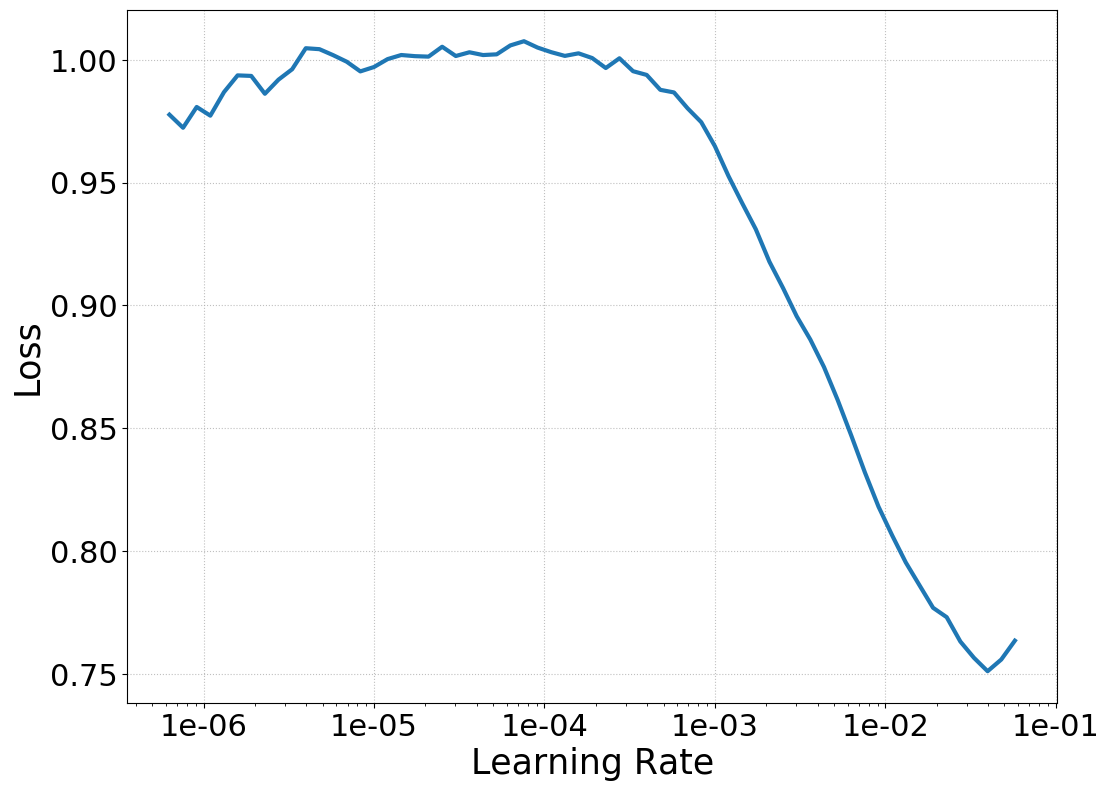

In [46]:
learn.recorder.plot()   #this plot shows initial losses with various learning rates

In [47]:
lr = 1e-7
learn.fit(1, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,1.002325,1.021512,00:06


In [48]:
lr = 1e-4
learn.fit(10, lr=lr, wd=wd) #run the training for 10 epochs

epoch,train_loss,valid_loss,time
0,0.051656,0.049244,00:06
1,0.035455,0.037269,00:06
2,0.032327,0.035323,00:06
3,0.033170,0.034447,00:06
4,0.032720,0.034002,00:06
5,0.032527,0.033241,00:06
6,0.030566,0.032607,00:06
7,0.030501,0.031834,00:06
8,0.029268,0.031514,00:06
9,0.028726,0.031199,00:06


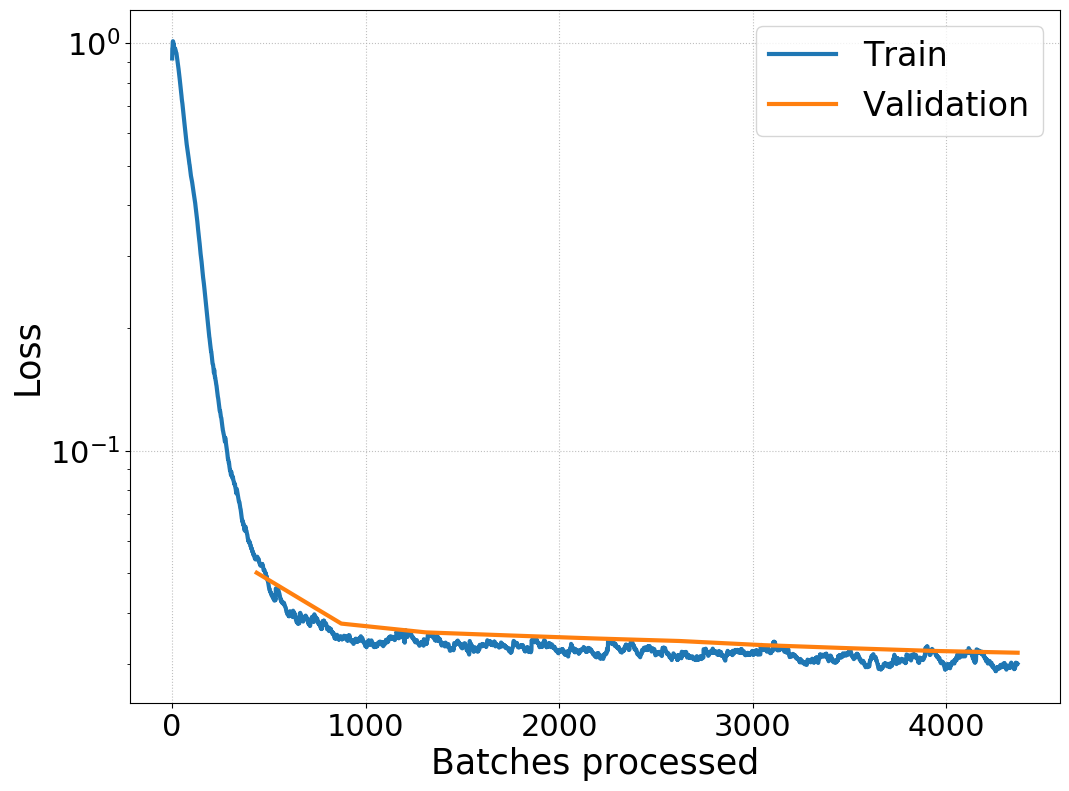

In [0]:
learn.recorder.plot_losses()   #plot training and validatio losses
plt.yscale('log')

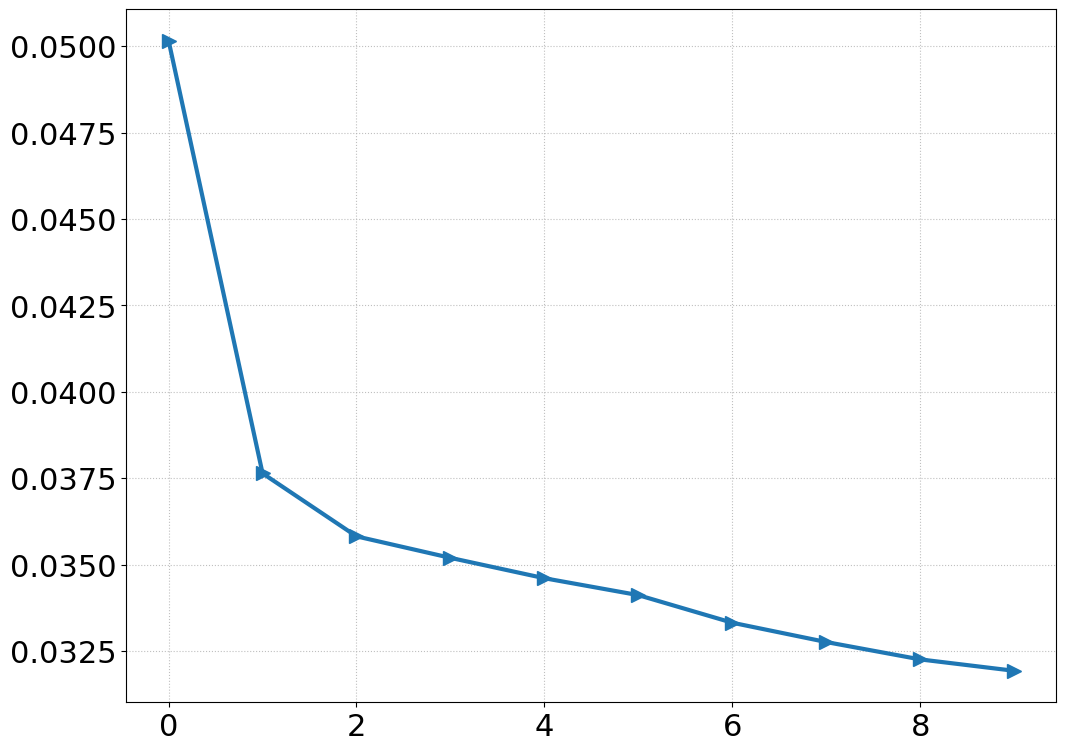

In [0]:
plt.plot(learn.recorder.val_losses, marker='>')

###Visualizing Weight means and standard deviations
Visualizing Weights helps in understanding the reasons for large losses and unusual performance of the neural network.


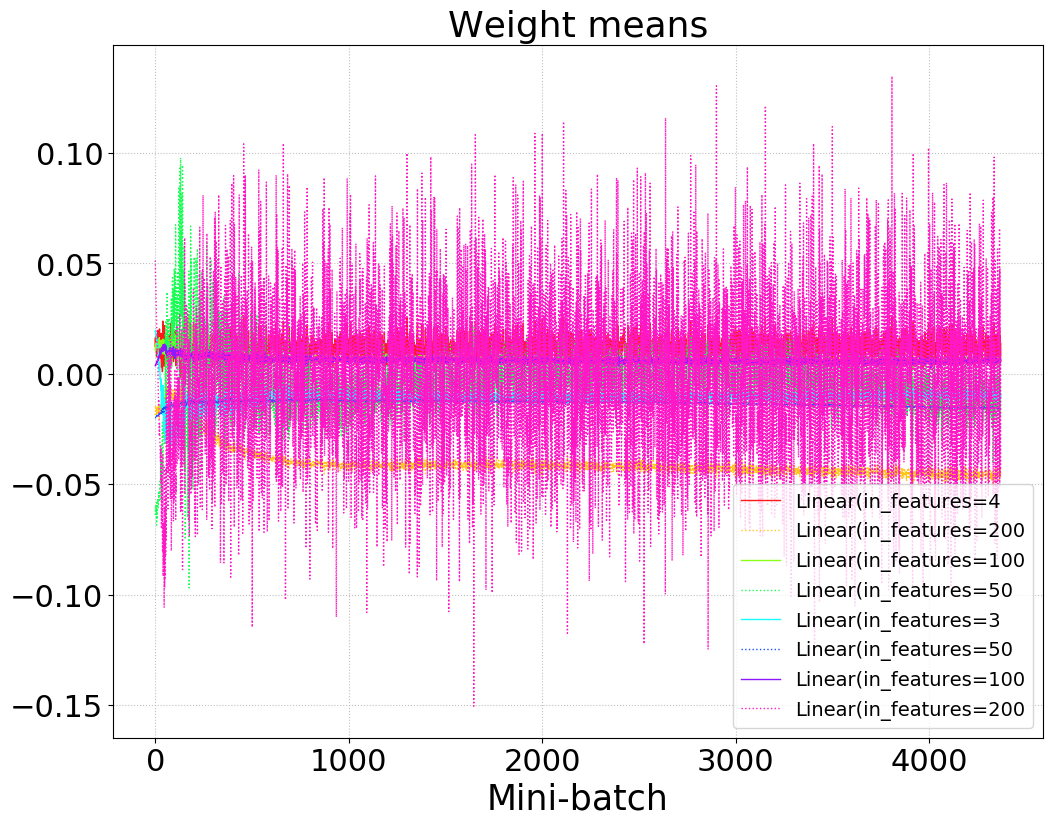

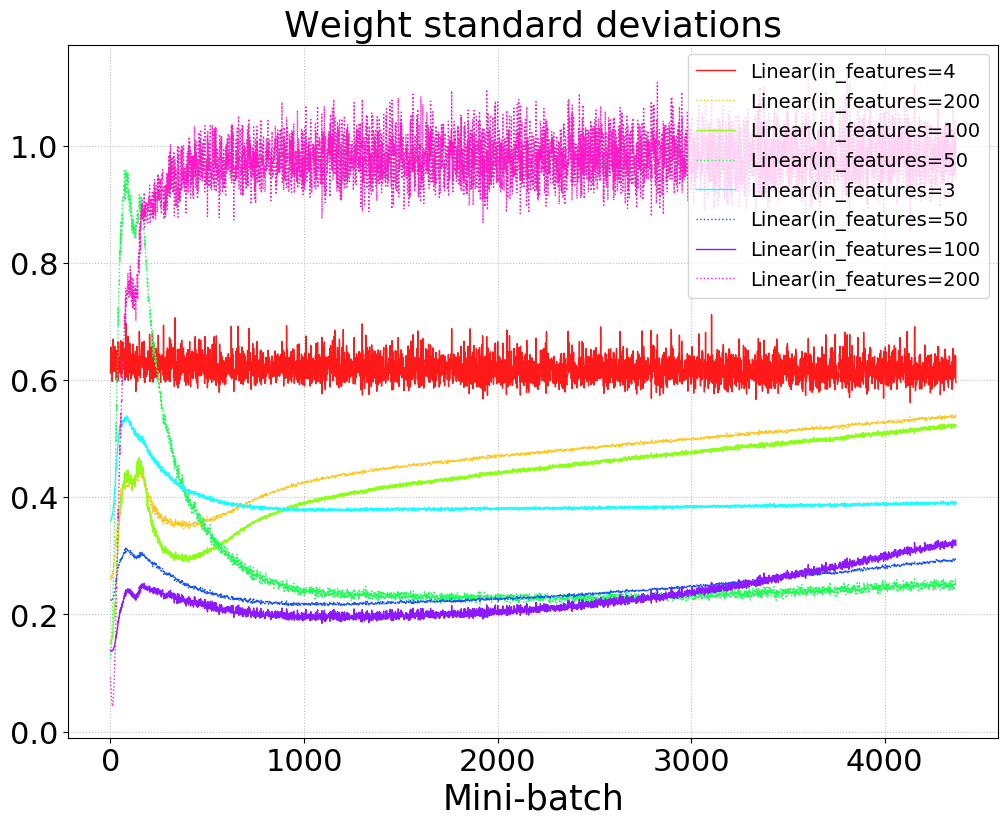

In [0]:
plot_activations(learn)

##Training

In [0]:
lr = 1e-6
learn.fit(300, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,0.029135,0.031674,00:06
1,0.028924,0.031668,00:06
2,0.031582,0.031659,00:06
3,0.029165,0.031655,00:06
4,0.030408,0.031654,00:06
5,0.030574,0.031645,00:06
6,0.028836,0.031638,00:06
7,0.030642,0.031638,00:06
8,0.029506,0.031630,00:06
9,0.029576,0.031628,00:06


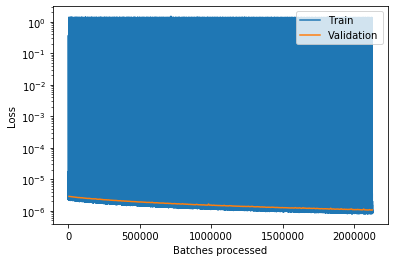

In [0]:
learn.recorder.plot_losses()
plt.yscale('log')

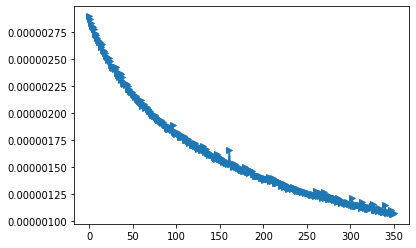

In [0]:
plt.plot(learn.recorder.val_losses, marker='>')

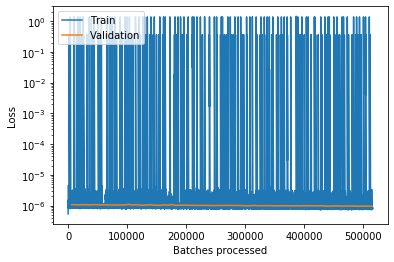

In [0]:
learn.recorder.plot_losses()
plt.yscale('log')

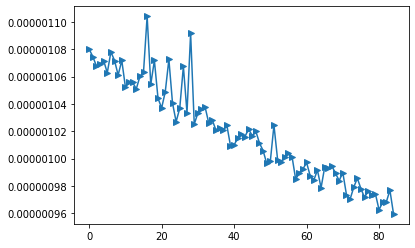

In [0]:
plt.plot(learn.recorder.val_losses, marker='>')
#plt.yscale('log')

In [0]:
lr = 3e-6
learn.fit(1000, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,0.000001,0.000001,02:01
1,0.000001,0.000001,01:49
2,0.024494,0.000001,01:50
3,0.000001,0.000001,02:16
4,0.000001,0.000001,02:04
5,0.000001,0.000001,01:51
6,0.000009,0.000001,01:54
7,0.000001,0.000001,01:59
8,0.000001,0.000001,02:08
9,0.000001,0.000001,01:58


KeyboardInterrupt: 

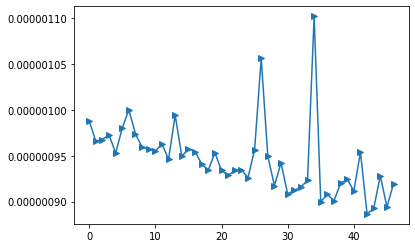

In [0]:
plt.plot(learn.recorder.val_losses, marker='>')
#plt.yscale('log')

In [0]:
lr = 1e-6
learn.fit(1000, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,0.000001,0.000001,01:53
1,0.000001,0.000001,01:49
2,0.000001,0.000001,01:47
3,0.000001,0.000001,01:53
4,0.000001,0.000001,01:55
5,0.000001,0.000001,01:56
6,0.000001,0.000001,01:56
7,0.000002,0.000001,01:46
8,0.000001,0.000001,01:51
9,0.000001,0.000001,01:48


KeyboardInterrupt: 

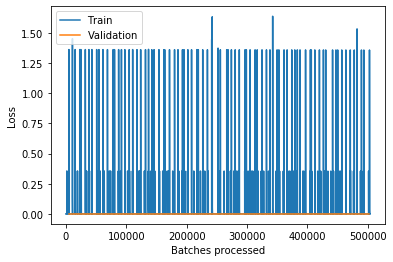

In [0]:
learn.recorder.plot_losses()
#plt.yscale('log')

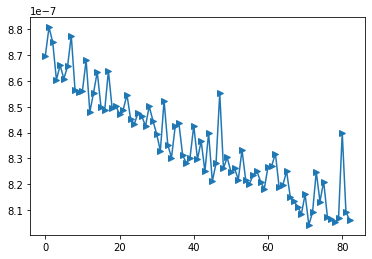

In [0]:
plt.plot(learn.recorder.val_losses, marker='>')
#plt.yscale('log')

In [0]:
lr = 1e-6
learn.fit(1000, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,0.003669,0.000001,02:02
1,0.000001,0.000001,02:22
2,0.000001,0.000001,02:00
3,0.000001,0.000001,01:56
4,0.000001,0.000001,01:49
5,0.000001,0.000001,01:50
6,0.000001,0.000001,02:06
7,0.000452,0.000001,02:39
8,0.000001,0.000001,02:06
9,0.000001,0.000001,01:58


KeyboardInterrupt: 

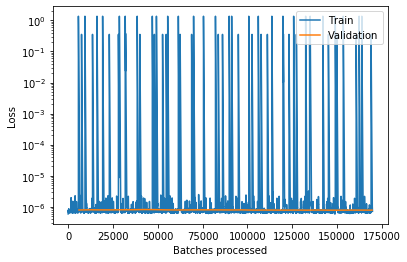

In [0]:
learn.recorder.plot_losses()
plt.yscale('log')

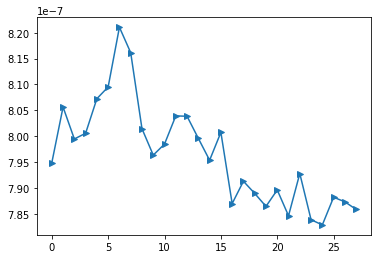

In [0]:
plt.plot(learn.recorder.val_losses, marker='>')
#plt.yscale('log')

In [0]:
lr = 1e-6
learn.fit(1000, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,0.000001,0.000001,01:58
1,0.000001,0.000001,03:56
2,0.000203,0.000001,02:55
3,0.000001,0.000001,02:50
4,0.000001,0.000001,02:51
5,0.000001,0.000001,03:02
6,0.000001,0.000001,02:57
7,0.000001,0.000001,02:50
8,0.000019,0.000001,02:52
9,0.000001,0.000001,02:54


KeyboardInterrupt: 

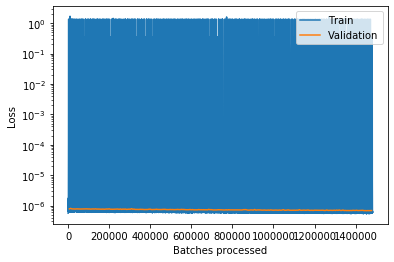

In [0]:
learn.recorder.plot_losses()
plt.yscale('log')

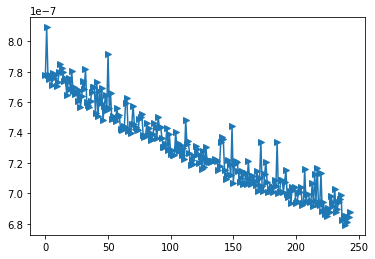

In [0]:
plt.plot(learn.recorder.val_losses, marker='>')
#plt.yscale('log')

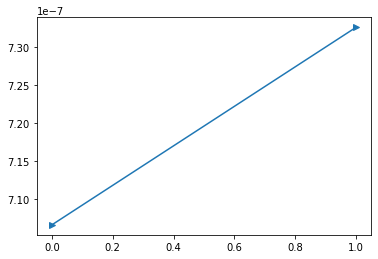

In [0]:
plt.plot(learn.recorder.val_losses, marker='>')
#plt.yscale('log')

In [0]:
lr = 1e-6
learn.fit(1000, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,0.000001,0.000001,01:58
1,0.000001,0.000001,01:43
2,0.000001,0.000001,01:44
3,0.000001,0.000001,01:46
4,0.000001,0.000001,01:42
5,0.000001,0.000001,01:43
6,0.000001,0.000001,01:47
7,0.000001,0.000001,01:52
8,0.000001,0.000001,01:50
9,0.000002,0.000001,01:49


KeyboardInterrupt: 

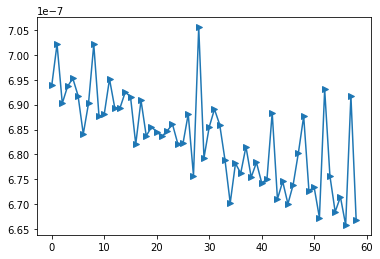

In [0]:
plt.plot(learn.recorder.val_losses, marker='>')
#plt.yscale('log')

###Save Trained Model

In [0]:
learn.save('AE_3D_200_no1cycle_trainforever')

###Evaluate Trained Model

In [0]:
learn.validate()

[5.2463446e-07]

In [0]:
curr_save_folder = 'trainforever_plots/'

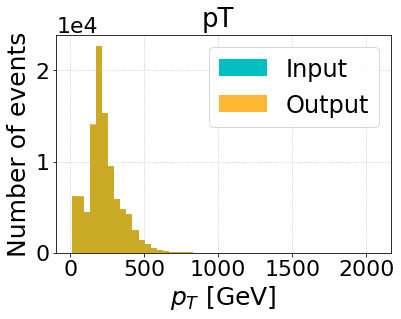

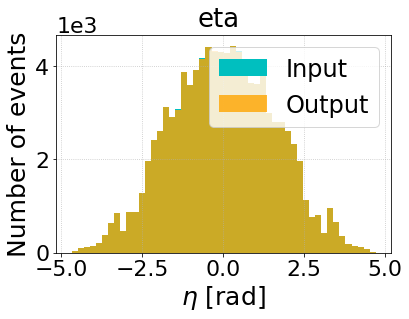

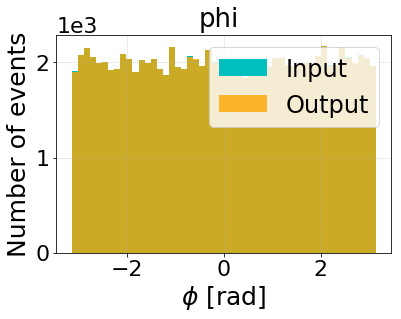

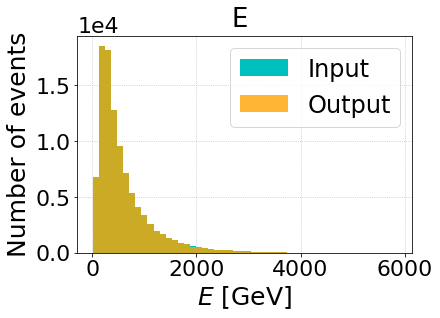

In [0]:
plt.close('all')
unit_list = ['[GeV]', '[rad]', '[rad]', '[GeV]']
variable_list = [r'$p_T$', r'$\eta$', r'$\phi$', r'$E$']
line_style = ['--', '-']
colors = ['orange', 'c']
markers = ['*', 's']

model.to('cpu')

# Histograms
idxs = (0, 100000)  # Choose events to compare
data = torch.tensor(test_x[idxs[0]:idxs[1]].values)
pred = model(data).detach().numpy()
pred = np.multiply(pred, train_std.values)
pred = np.add(pred, train_mean.values)
data = np.multiply(data, train_std.values)
data = np.add(data, train_mean.values)

alph = 0.8
n_bins = 50
for kk in np.arange(4):
    plt.figure(kk + 4)
    n_hist_data, bin_edges, _ = plt.hist(data[:, kk], color=colors[1], label='Input', alpha=1, bins=n_bins)
    n_hist_pred, _, _ = plt.hist(pred[:, kk], color=colors[0], label='Output', alpha=alph, bins=bin_edges)
    plt.suptitle(train_x.columns[kk])
    plt.xlabel(variable_list[kk] + ' ' + unit_list[kk])
    plt.ylabel('Number of events')
    ms.sciy()
    # plt.yscale('log')
    plt.legend()
    fig_name = 'trainforever_hist_%s' % train.columns[kk]
    #plt.savefig(curr_save_folder + fig_name)

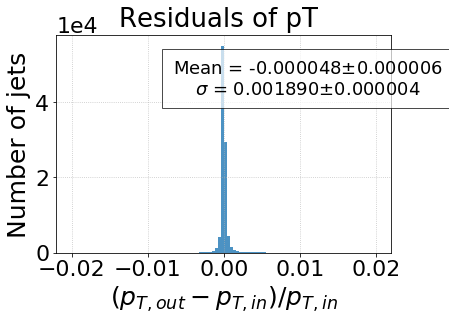

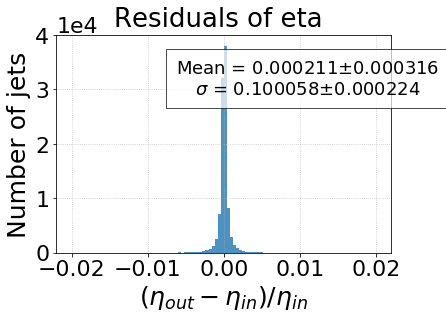

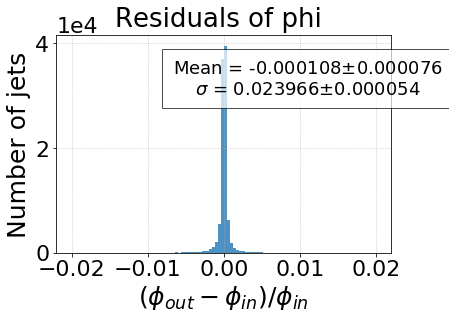

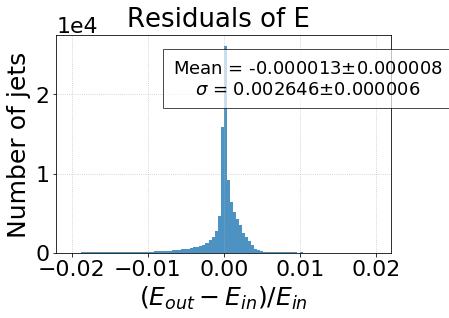

In [0]:
import utils
from scipy import stats
residual_strings = [r'$(p_{T,out} - p_{T,in}) / p_{T,in}$',
                        r'$(\eta_{out} - \eta_{in}) / \eta_{in}$',
                        r'$(\phi_{out} - \phi_{in}) / \phi_{in}$',
                        r'$(E_{out} - E_{in}) / E_{in}$']
residuals = (pred - data.detach().numpy()) / data.detach().numpy()
range = (-.02, .02)
#range=None
for kk in np.arange(4):
    plt.figure()
    n_hist_pred, bin_edges, _ = plt.hist(
        residuals[:, kk], label='Residuals', linestyle=line_style[0], alpha=alph, bins=100, range=range)
    plt.suptitle('Residuals of %s' % train.columns[kk])
    plt.xlabel(residual_strings[kk])  # (train.columns[kk], train.columns[kk], train.columns[kk]))
    plt.ylabel('Number of jets')
    ms.sciy()
    #plt.yscale('log')
    std = np.std(residuals[:, kk])
    std_err = utils.std_error(residuals[:, kk])
    mean = np.nanmean(residuals[:, kk])
    sem = stats.sem(residuals[:, kk], nan_policy='omit')
    ax = plt.gca()
    plt.text(.75, .8, 'Mean = %f$\pm$%f\n$\sigma$ = %f$\pm$%f' % (mean, sem, std, std_err), bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 10},
             horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=18)
    fig_name = 'trainforever_residual_%s' % train.columns[kk]
    #plt.savefig(curr_save_folder + fig_name)

In [0]:
residuals[:,2].shape

(100000,)

In [0]:
test

,pT,eta,phi,E
1586759,-0.380740,-1.083800,0.689416,-0.109718
355555,-0.276404,0.267833,0.428651,-0.681077
1562615,-0.375840,-1.163177,-1.014827,0.014316
25428,0.991884,-1.495158,-0.814597,2.359694
1291372,-0.398538,-1.000142,-1.042772,-0.229629
...,...,...,...,...
968705,-0.462667,-0.179443,0.117370,-0.734594
1136375,0.023332,-1.109066,0.750207,0.194211
1356104,-0.037530,0.212707,0.092354,-0.636127
484147,-0.726353,0.487041,-1.719046,-0.732523


TypeError: You must first set_array for mappable

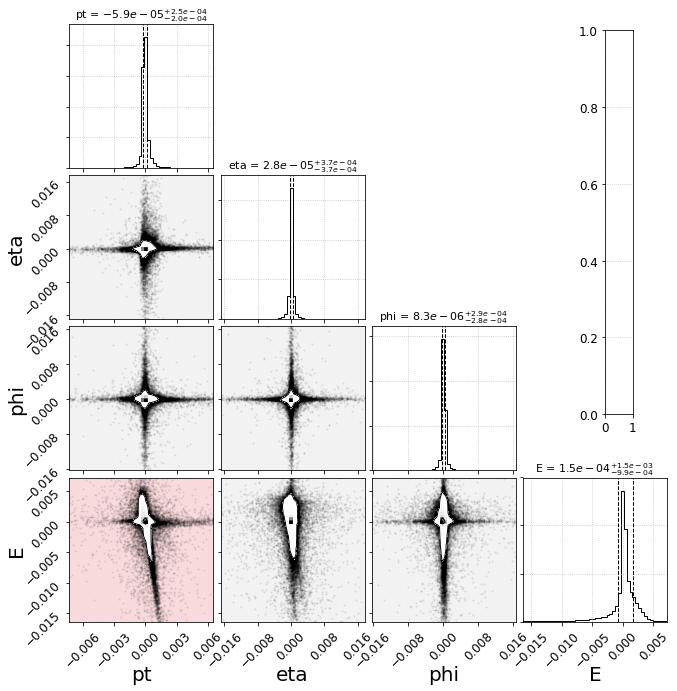

In [0]:
import corner.corner as corner
import seaborn as sns

res_df = pd.DataFrame({'pt': residuals[:, 0], 'eta': residuals[:, 1], 'phi': residuals[:, 2], 'E': residuals[:, 3]})
save = False

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)
#cmap = 'RdBu'
norm = mpl.colors.Normalize(vmin=-1, vmax=1, clip=False)
mappable = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

group = ['pt', 'eta', 'phi', 'E']

label_kwargs = {'fontsize': 20}
title_kwargs = {"fontsize": 11}
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
group_arr = res_df.values
corr = res_df.corr()
qs = np.quantile(group_arr, q=[.0025, .9975], axis=0)
ndim = qs.shape[1]
ranges = [tuple(qs[:, kk]) for kk in np.arange(ndim)]
figure = corner(group_arr, range=ranges, plot_density=True, plot_contours=True, no_fill_contours=False, #range=[range for i in np.arange(ndim)],
                bins=50, labels=group, label_kwargs=label_kwargs, #truths=[0 for kk in np.arange(qs.shape[1])],
                show_titles=True, title_kwargs=title_kwargs, quantiles=(0.16, 0.84),
                # levels=(1 - np.exp(-0.5), .90), fill_contours=False, title_fmt='.2e')
                levels=(1 - np.exp(-0.5), .90), fill_contours=False, title_fmt='.1e')

# # Extract the axes
axes = np.array(figure.axes).reshape((ndim, ndim))
# Loop over the diagonal
linecol = 'r'
linstyl = 'dashed'
# Loop over the histograms
for yi in np.arange(ndim):
    for xi in np.arange(yi):
        ax = axes[yi, xi]
        # Set face color according to correlation
        ax.set_facecolor(color=mappable.to_rgba(corr.values[yi, xi]))
cax = figure.add_axes([.87, .4, .04, 0.55])
cbar = plt.colorbar(mappable, cax=cax, format='%.1f', ticks=np.arange(-1., 1.1, 0.2))
cbar.ax.set_ylabel('Correlation', fontsize=20)

if save:
    fig_name = 'corner_3d.png'
    plt.savefig(curr_save_folder + fig_name)